# Week 2 Problem Set

## Exercise 1

In [8]:
#Import some packages

import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import linalg as linalg
from numpy import linalg as LA
from numpy import random as rand
from numba import vectorize, jit, njit, float64, prange

In [9]:
#Import the data

matrix = np.loadtxt('matrix_data.txt')

### Find the maximum eigenvalue using scipy

In [23]:
evals = abs(linalg.eig(matrix)[0])
max_eig=np.max(evals)
print(max_eig)


1.0044277694480632


### Iterate to the maximum eigenvalue

In [58]:
ones = np.ones(10) #create a non-zero vector

max_iter = 10000 #number of iterations we want
store = np.zeros(max_iter) #initialise matrix to store output

for i in range(1, max_iter + 1 , 1):
    A = np.transpose(np.matmul(LA.matrix_power(matrix, i), ones))
    B = np.matmul(LA.matrix_power(matrix, i), ones)
    C = np.matmul(A, B)
    D = C**(1/i)
    store[i-1] = D
       
print(store[max_iter-1])


1.0091163184636458


<Figure size 432x288 with 0 Axes>

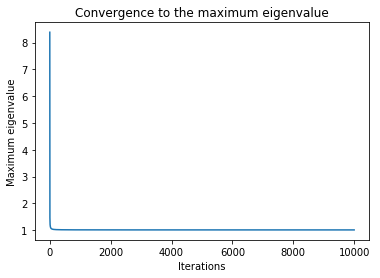

In [56]:
#Plot

plt.figure()
fig, ax = plt.subplots()
ax.plot(store[:])
plt.xlabel('Iterations')
plt.ylabel('Maximum eigenvalue')
plt.title('Convergence to the maximum eigenvalue')
plt.show()

## Exercise 2

In [10]:
#Define the quad function

@jit
def quad():
    n=100000 #set number of points we want
    x=np.empty(n) # initialise x
    x[0] = rand.uniform(0,1) #Initialise some x0
    for t in range(n-1):
        x[t+1] = 4*x[t]*(1 - x[t])
    return x


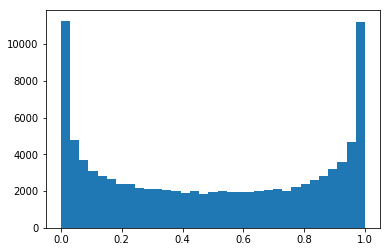

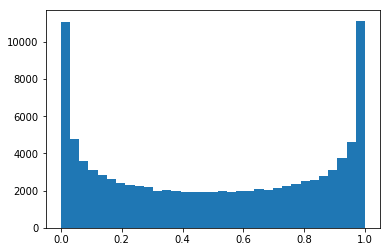

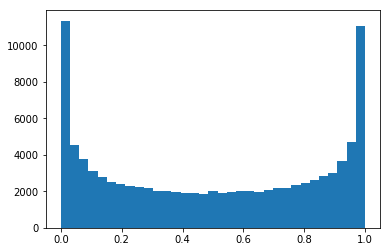

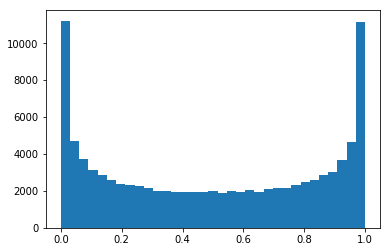

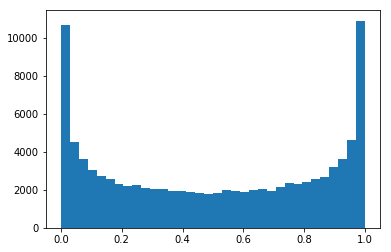

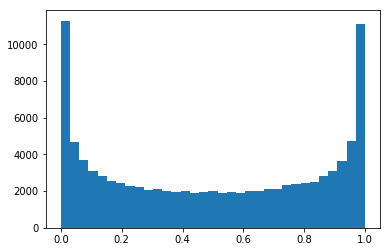

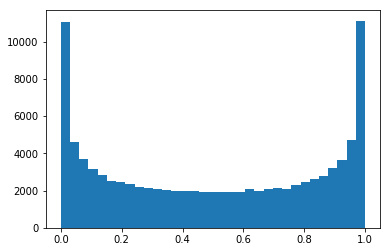

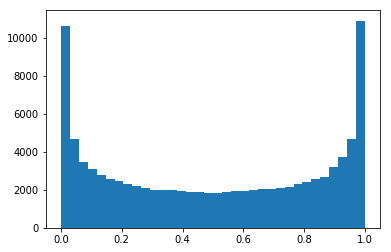

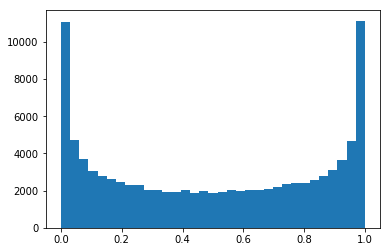

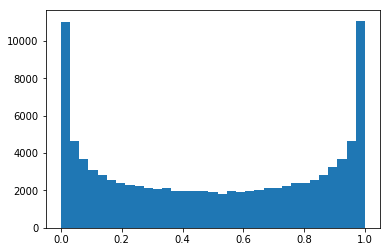

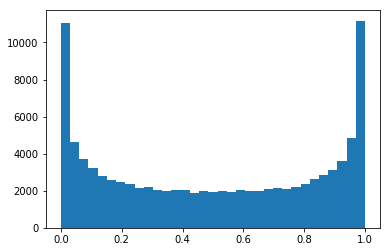

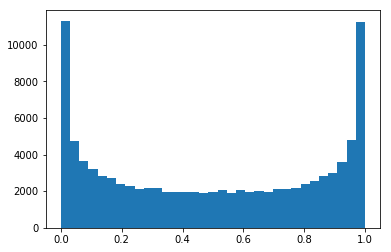

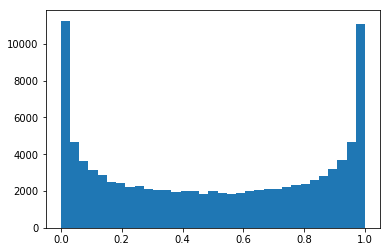

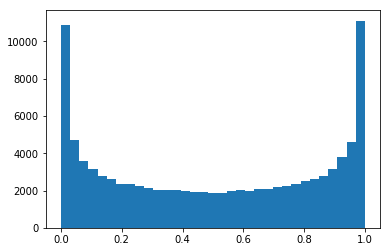

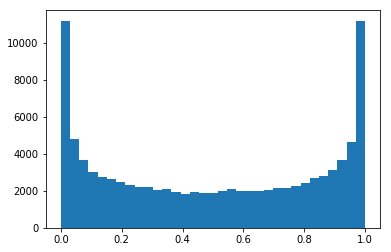

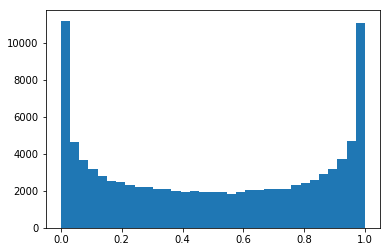

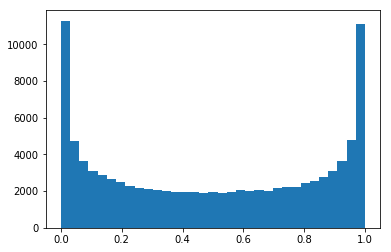

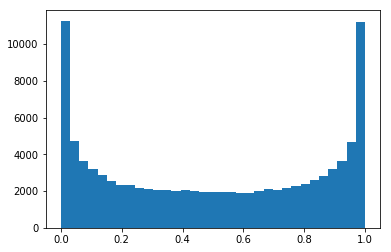

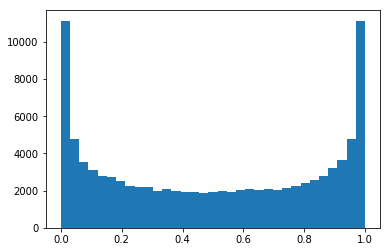

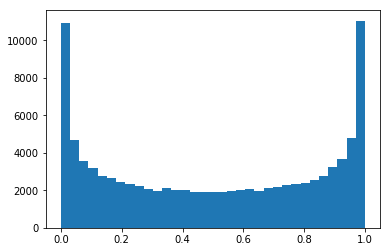

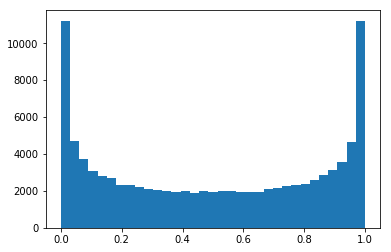

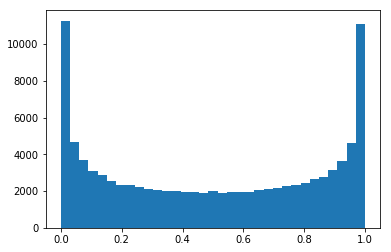

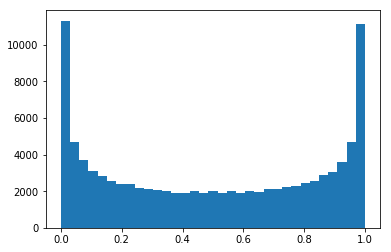

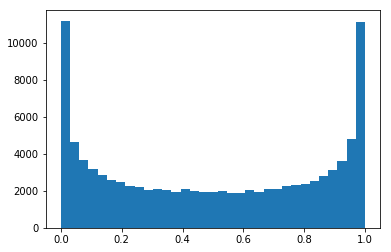

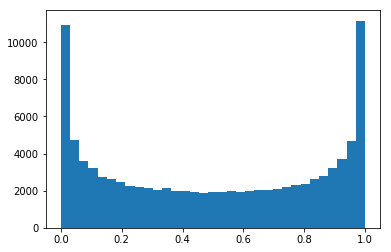

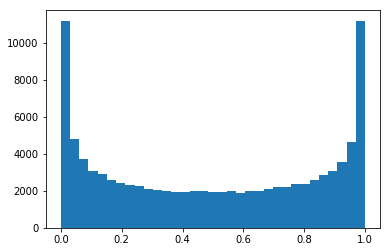

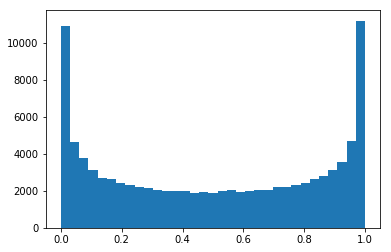

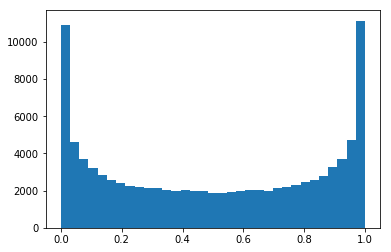

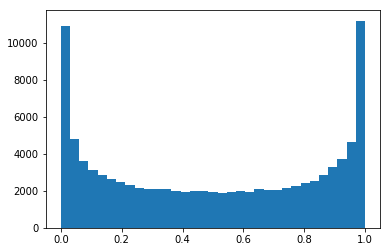

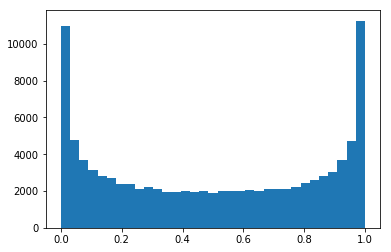

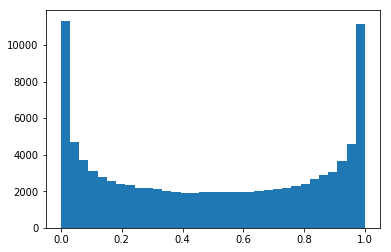

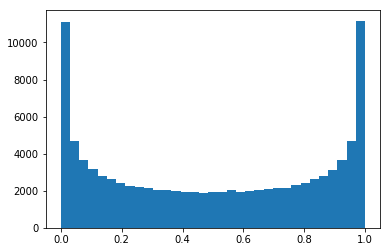

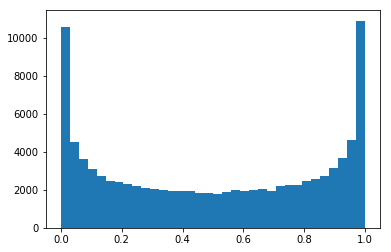

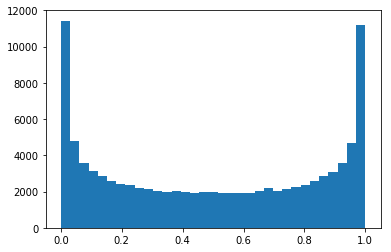

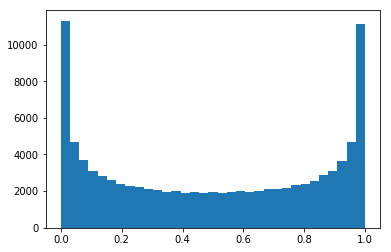

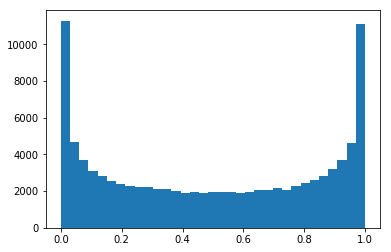

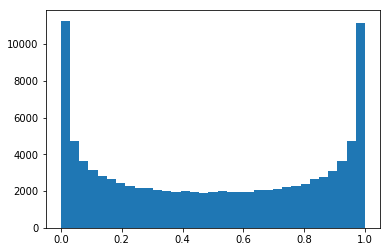

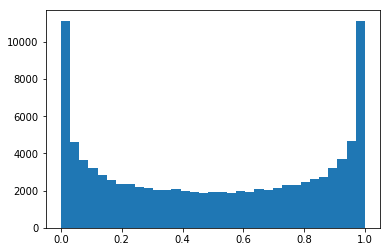

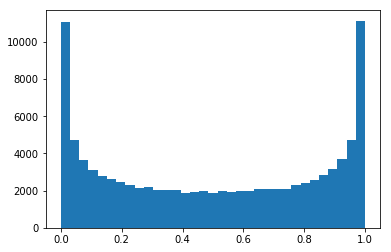

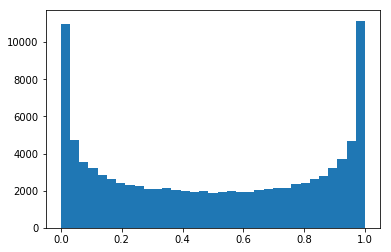

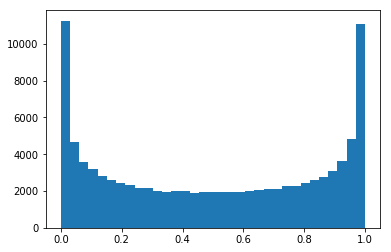

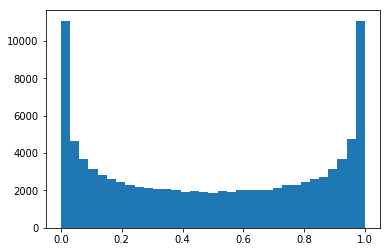

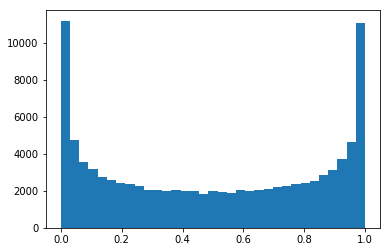

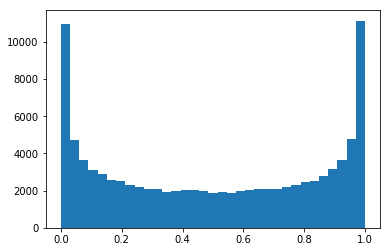

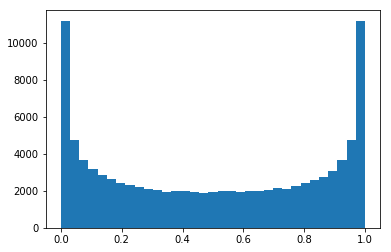

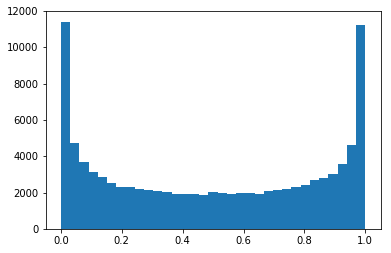

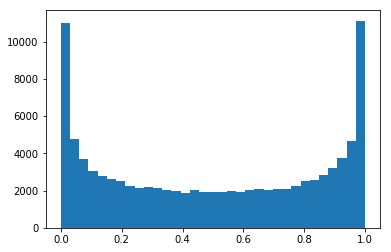

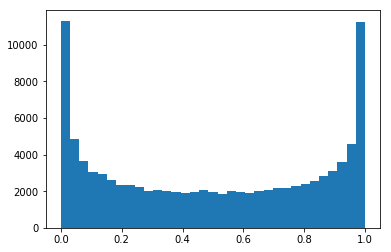

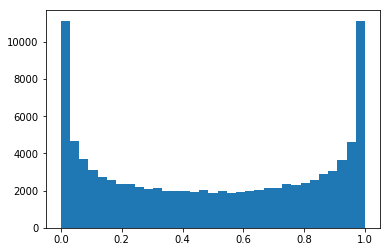

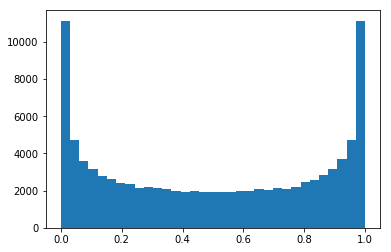

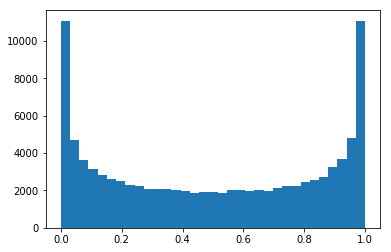

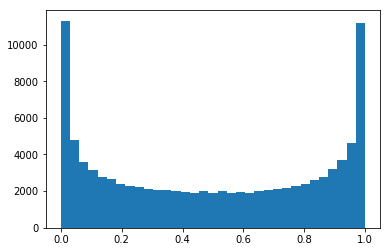

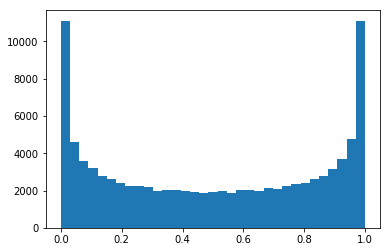

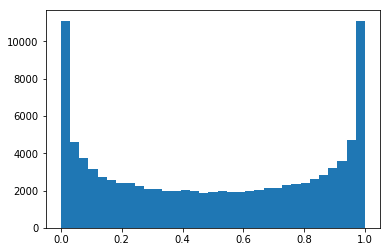

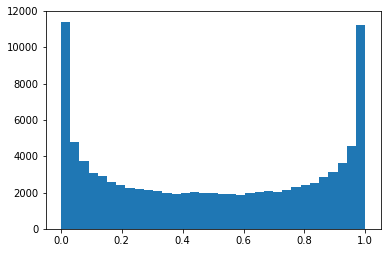

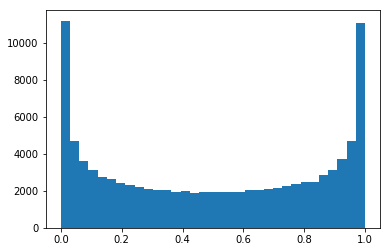

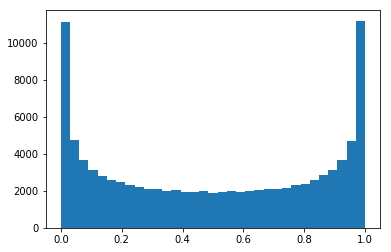

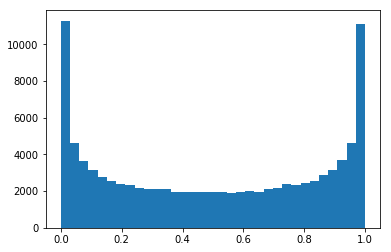

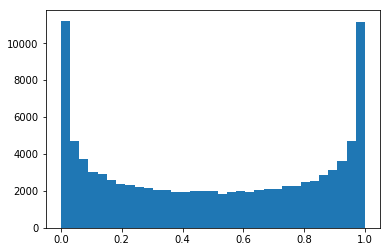

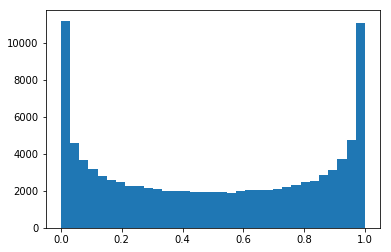

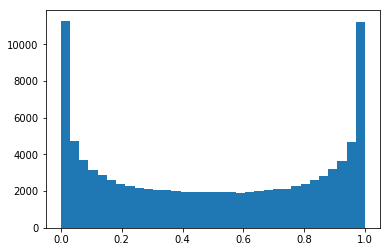

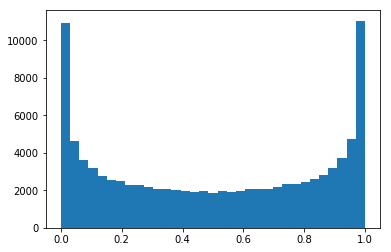

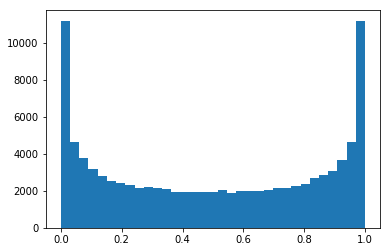

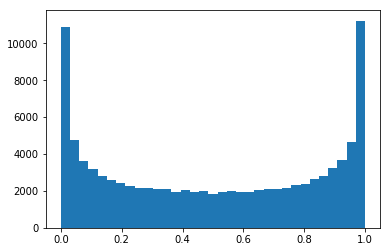

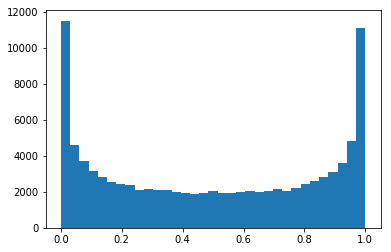

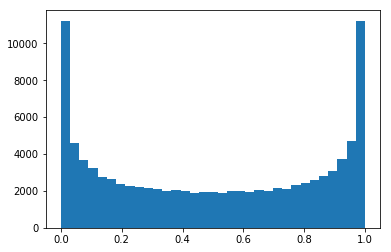

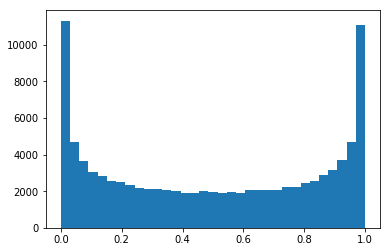

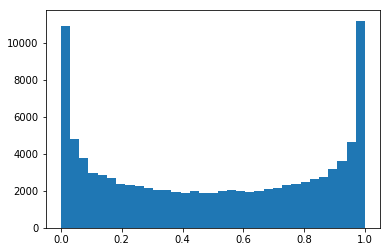

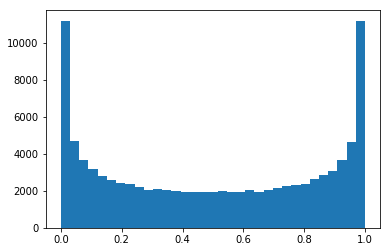

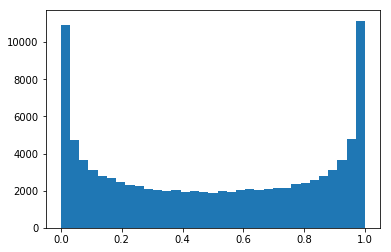

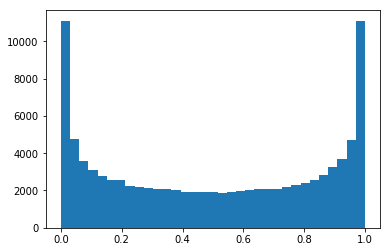

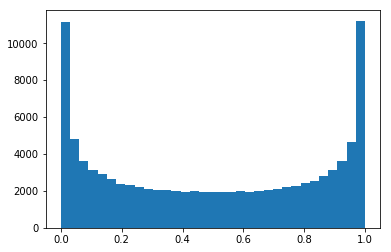

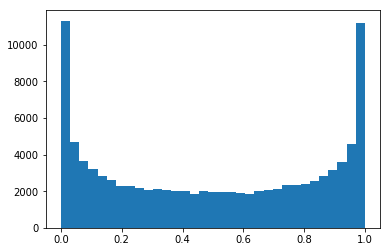

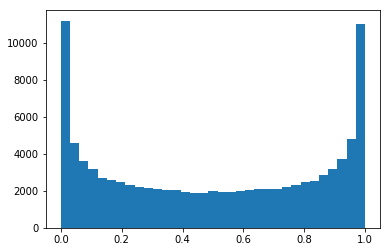

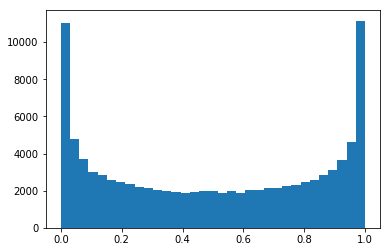

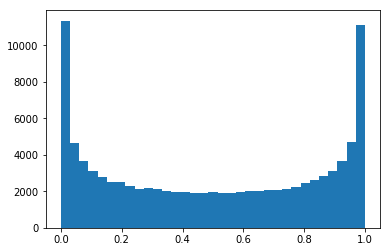

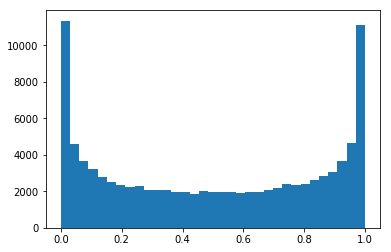

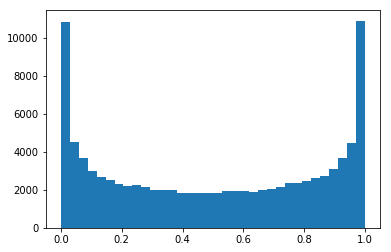

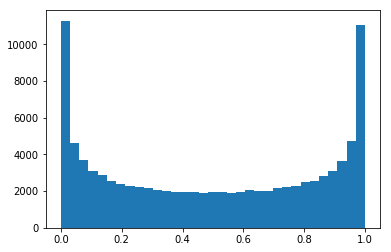

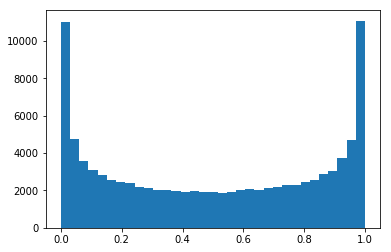

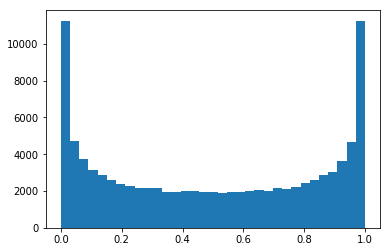

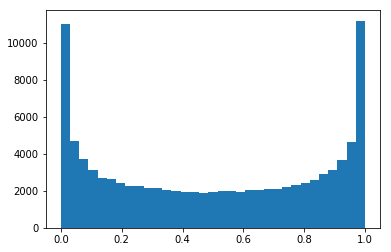

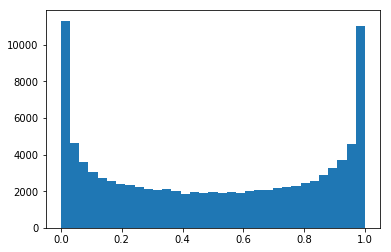

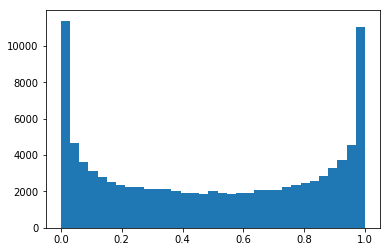

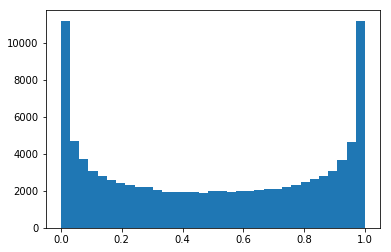

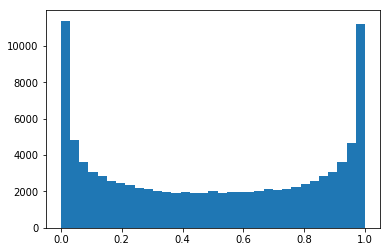

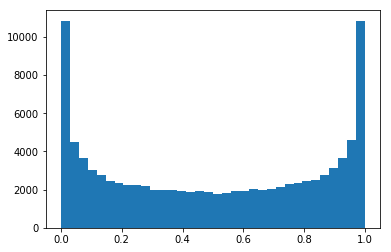

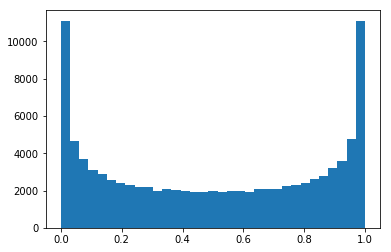

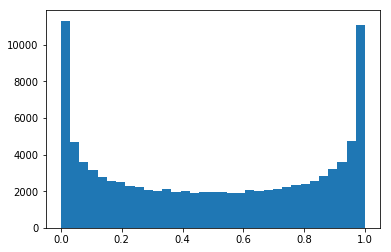

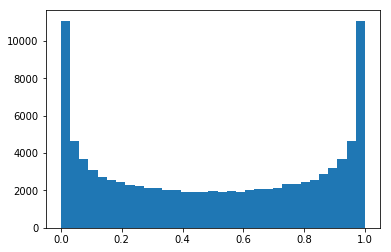

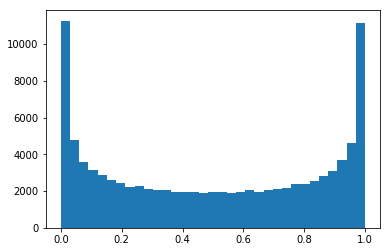

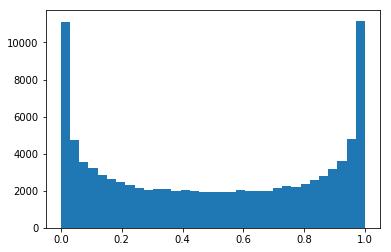

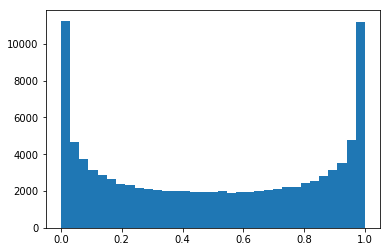

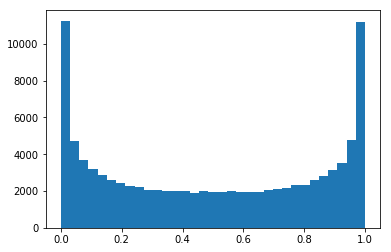

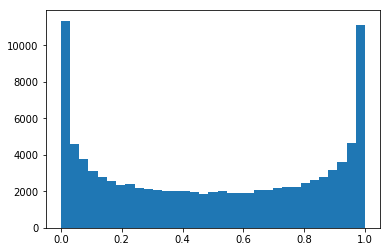

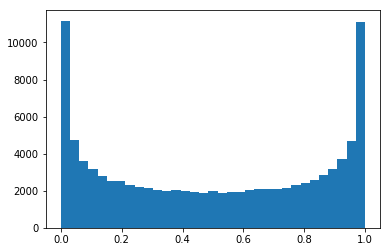

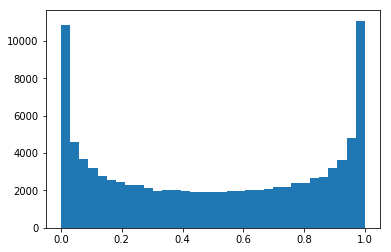

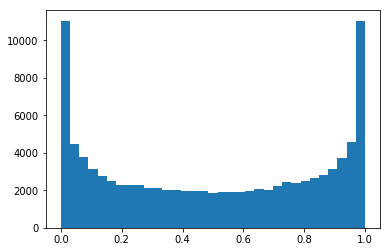

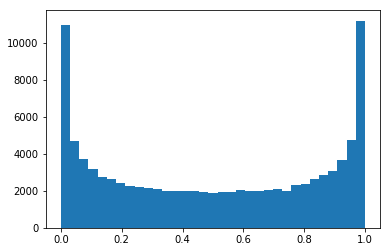

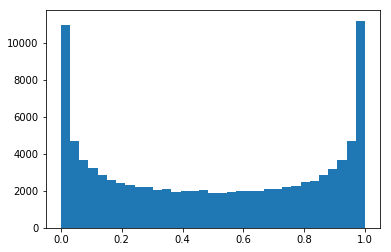

In [11]:
#Do the quad  function 100 times

for i in range(100):
    x = quad()
    plt.hist(x, bins='auto')
    plt.show()


## Exercise 3

We know that $\lim_{t\to\infty}g^{t}(x) = \hat x$
And similarly $\lim_{t\to\infty}g^{t-1}(x) = \hat x$

Since $g$ is continuous at $\hat x \in \mathbb X$ then we know that:

$\lim_{t\to\infty}g^{t}(x) = g(\lim_{t\to\infty}g^{t-1}(x))$

From the first two lines, we can rewrite the right hand side of the above equation as $g(\hat x)$ and the left hand side as $\hat x$.

Thus we have:

$g(\hat x) = \hat x$ and the proposition is proved.